<a href="https://colab.research.google.com/github/Hacko97/MLProject_Pump_it_Up_Data_Mining_the_Water_Table/blob/main/pump_up_water_table.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# general imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
# imports for models
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
import xgboost
from xgboost.sklearn import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier

#from sklearn.preprocessing import LabelEncoder, Imputer
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, RandomizedSearchCV, KFold, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
# Importing data
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML_project/training_set_features.csv')
train_labels = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML_project/training_set_labels.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML_project/test_set_features.csv')

# combine train and test data
train_data['train'] = 1
test_data['train'] = 0
combined = pd.concat([train_data,test_data])

In [ ]:
train_labels['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [ ]:
#imbalanced classes
new_df = pd.merge(train_data, train_labels, on = 'id')
new_df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,train,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,1,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,1,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,1,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,1,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,1,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,1,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,1,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,1,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,1,functional


In [ ]:
# process labels
label_dict_status_group = {'functional':0,
                   'non functional': 1,
                   'functional needs repair': 2}
new_df.status_group = new_df.status_group.replace(label_dict_status_group)
new_df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,train,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,1,0
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,1,0
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,1,0
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,1,1
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,1,0
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,1,0
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,1,0
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,1,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb1194b1d0>,
      dtype=object)

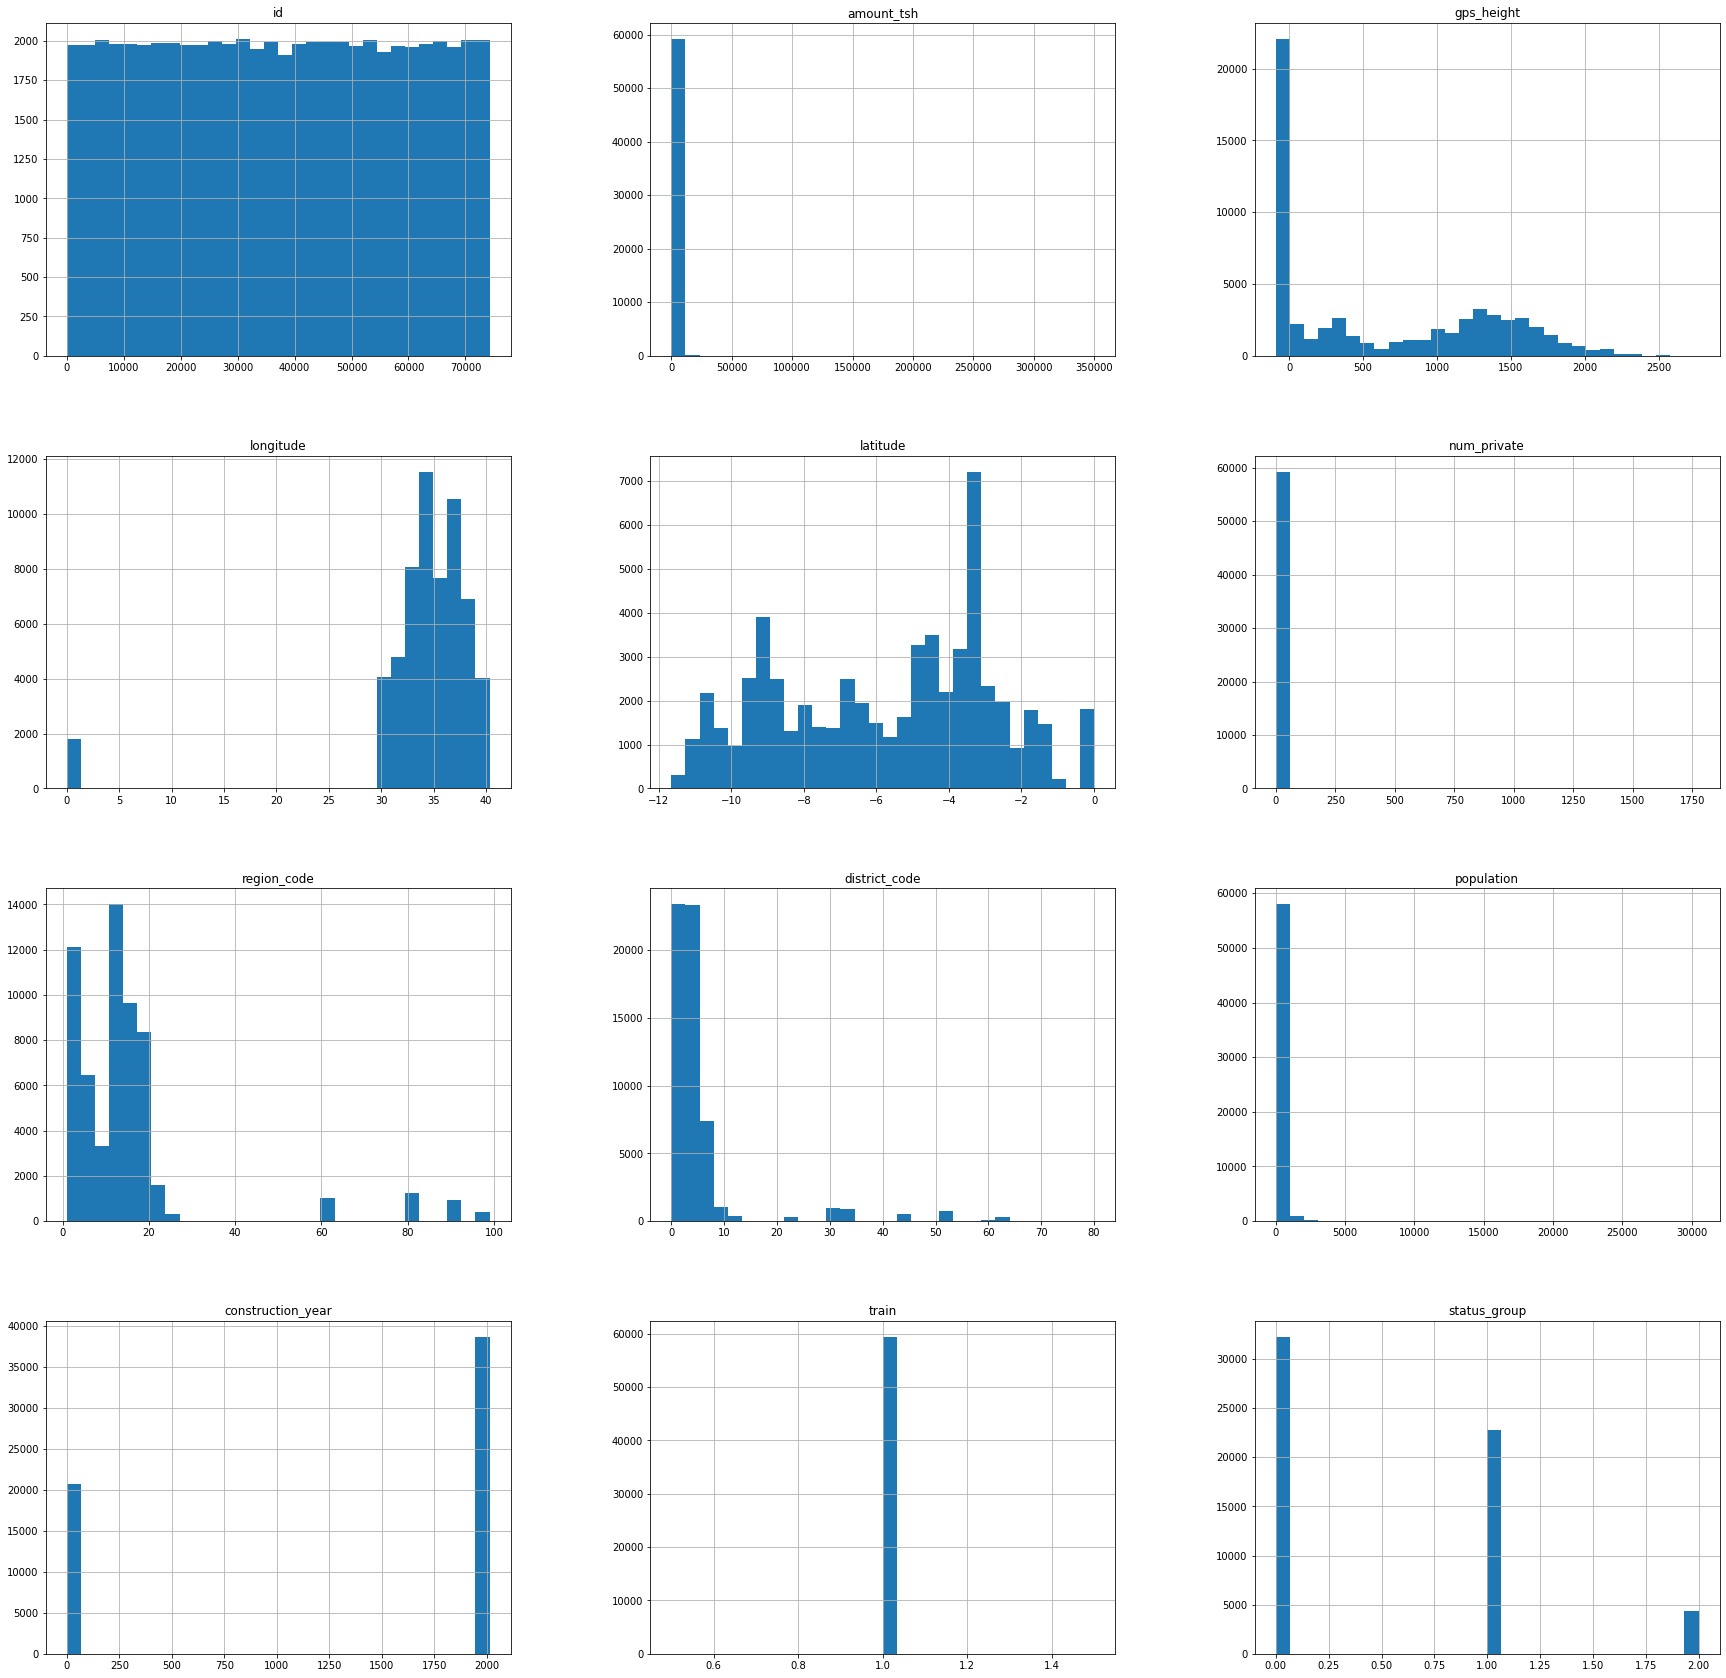

In [ ]:
new_df.hist(bins=30,figsize=(30,30))

In [ ]:
for i in new_df.columns:
    print(i,',' ,'{:.1%}'.format(np.mean(new_df[i].isnull())),'nulls',',',type(new_df[i][0]),) 
    new_df[i].nunique(), 'unique values'

id , 0.0% nulls , <class 'numpy.int64'>
amount_tsh , 0.0% nulls , <class 'numpy.float64'>
date_recorded , 0.0% nulls , <class 'str'>
funder , 6.1% nulls , <class 'str'>
gps_height , 0.0% nulls , <class 'numpy.int64'>
installer , 6.2% nulls , <class 'str'>
longitude , 0.0% nulls , <class 'numpy.float64'>
latitude , 0.0% nulls , <class 'numpy.float64'>
wpt_name , 0.0% nulls , <class 'str'>
num_private , 0.0% nulls , <class 'numpy.int64'>
basin , 0.0% nulls , <class 'str'>
subvillage , 0.6% nulls , <class 'str'>
region , 0.0% nulls , <class 'str'>
region_code , 0.0% nulls , <class 'numpy.int64'>
district_code , 0.0% nulls , <class 'numpy.int64'>
lga , 0.0% nulls , <class 'str'>
ward , 0.0% nulls , <class 'str'>
population , 0.0% nulls , <class 'numpy.int64'>
public_meeting , 5.6% nulls , <class 'bool'>
recorded_by , 0.0% nulls , <class 'str'>
scheme_management , 6.5% nulls , <class 'str'>
scheme_name , 47.4% nulls , <class 'str'>
permit , 5.1% nulls , <class 'bool'>
construction_year , 0.

In [ ]:
new_df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,train,status_group
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.0,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475,1.0,0.529596
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547,0.0,0.628080
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000,1.0,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000,1.0,0.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000,1.0,1.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000,1.0,2.000000


In [ ]:
new_df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [ ]:
#Function to drop irrelevant columns, convert booleans, get top n values, one hot encode
#parameters are csv, number of top features to obtain, and flag for train vs test data
def preprocess(data,n):
    data = data.drop(columns = ['date_recorded','gps_height','longitude','latitude','wpt_name',
                                'num_private','subvillage','lga','ward','recorded_by','extraction_type_group',
                                'extraction_type','scheme_name','management','waterpoint_type_group','source',
                                'source_class','quantity_group','quality_group','payment_type'])
    
    data.permit = data.permit.astype(bool).astype(int)
    data.public_meeting = data.public_meeting.astype(bool).astype(int)
    
    def get_n(x,n):
    
        list_a = set(x.value_counts().index[:n].values) #Gets the top 50 values from the series
        x[~x.isin(list_a)] = 'Other' #vectorisation - boolean mask; tilda - inverting the boolean mask
        return x
 
    data.funder = get_n(data.funder,n)
    data.installer = get_n(data.installer,n) 
    
    cat_columns = ['basin','scheme_management','quantity',
               'extraction_type_class', 'management_group','payment', 
               'water_quality', 'source_type','waterpoint_type',
               'region','installer', 'funder']
 
    data = pd.get_dummies(data,columns = cat_columns)
 
    return data

# process labels
label_dict_status_group = {'functional':0,
                   'non functional': 1,
                   'functional needs repair': 2}
train_labels.status_group = train_labels.status_group.replace(label_dict_status_group)

In [ ]:
# create datasets for 50 top features
comb_50 = preprocess(combined,50)
comb_100 = preprocess(combined,100)

# split train test and drop additional column
train_50 = comb_50[comb_50['train']==1]
train_50 = train_50.drop(['train'],axis=1)
test_50 = comb_50[comb_50['train']==0]
test_50 = test_50.drop(['train'],axis=1)

# combining both train files
train_50 = pd.merge(train_50, train_labels, on = 'id')


# export as csv files
train_50.to_csv('train_50.csv', sep=',', encoding='utf-8', index=False)
test_50.to_csv('test_50.csv', sep=',', encoding='utf-8', index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [ ]:
# read in and split the data
mod_data = pd.read_csv('train_50.csv',index_col='id')
# X_train, X_test, y_train, y_test = train_test_split(
#     mod_data.drop(columns=['status_group']), mod_data['status_group'],
#     test_size=0.33, random_state=1)

X_train = mod_data.drop(columns=['status_group'])
y_train = mod_data['status_group']
X_train.head()

,amount_tsh,region_code,district_code,population,public_meeting,permit,construction_year,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,scheme_management_Company,scheme_management_None,scheme_management_Other,scheme_management_Parastatal,scheme_management_Private operator,scheme_management_SWC,scheme_management_Trust,scheme_management_VWC,scheme_management_WUA,scheme_management_WUG,scheme_management_Water Board,scheme_management_Water authority,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,...,funder_Dwe,funder_Dwsp,funder_Fini Water,funder_Finw,funder_Germany Republi,funder_Government Of Tanzania,funder_Hesawa,funder_Hifab,funder_Isf,funder_Jaica,funder_Jica,funder_Kiliwater,funder_Kkkt,funder_Lawatefuka Water Supply,funder_Lga,funder_Magadini-makiwaru Water,funder_Ministry Of Water,funder_Mission,funder_Netherlands,funder_Norad,funder_Other,funder_Oxfam,funder_Plan Int,funder_Private,funder_Private Individual,funder_Rc,funder_Rc Church,funder_Roman,funder_Rudep,funder_Rural Water Supply And Sanitat,funder_Rwssp,funder_Shipo,funder_Tasaf,funder_Tcrs,funder_Unicef,funder_Water,funder_Wateraid,funder_World Bank,funder_World Vision,funder_Wsdp
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,11,5,109,1,0,1999,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8776,0.0,20,2,280,1,1,2010,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
34310,25.0,21,4,250,1,1,2009,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
67743,0.0,90,63,58,1,1,1986,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
19728,0.0,18,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Random forest
start_time = time.time()

# fit random forest
clf = RandomForestClassifier(n_estimators=1000, random_state=0)
# Decision Tree
#clf = tree.DecisionTreeClassifier()

start_time = time.time()
clf.fit(X_train,y_train)

# print("--- %s seconds ---" % (time.time() - start_time))
# print(classification_report(y_test,clf.predict(X_test)))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
test_data = pd.read_csv('test_50.csv',index_col='id')
preds = clf.predict(test_data)
# print(type(preds))
# y_preds = pd.DataFrame(
#     {
#         "status_group": preds
#     },
#         index = y_eval.index
#  )

In [ ]:
submission_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML_project/SubmissionFormat.csv", 
                            index_col="id")
submission_df.head()

,status_group
id,
50785,predicted label
51630,predicted label
17168,predicted label
45559,predicted label
49871,predicted label


In [ ]:
test_features_df = pd.read_csv("/content/test_50.csv",index_col='id')

test_probas = clf.predict(test_features_df)
# test_probas

In [ ]:
len(test_probas)

14850

In [ ]:
# Make sure we have the rows in the same order
np.testing.assert_array_equal(test_features_df.index.values, 
                               submission_df.index.values)

# Save predictions to submission data frame
submission_df["status_group"] = test_probas
# submission_df["status_group"] = submission_df["status_group"].astype(np.int64)
submission_df.head()

,status_group
id,
50785,1
51630,0
17168,0
45559,1
49871,0


In [ ]:
# process labels
label_dict_status_group = {0:'functional',
                   1:'non functional',
                   2:'functional needs repair'}
submission_df.status_group = submission_df.status_group.replace(label_dict_status_group)

In [ ]:
submission_df.to_csv('my_submission_decision_tree.csv', index=True)
!head my_submission.csv

id,status_group
50785,non functional
51630,functional
17168,functional
45559,non functional
49871,functional
52449,functional
24806,non functional
28965,non functional
36301,non functional
